<a href="https://colab.research.google.com/github/sanishrai/UdacityDeeplearingGithub/blob/master/FashionMNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import torch
import helper
import matplotlib.pyplot as plt

In [2]:
from torch import nn,optim
import torch.nn.functional as F

class Network(nn.Module):
  def __init__(self):
    super().__init__()
    self.hidden1 = nn.Linear(784,256)
    self.hidden2 = nn.Linear(256,128)
    self.hidden3 = nn.Linear(128,64)
    self.output = nn.Linear(64,10)

  def forward (self,x):
     # make sure input tensor is flattened
    x = x.view(x.shape[0], -1)
    x=F.relu(self.hidden1(x))
    x=F.relu(self.hidden2(x))
    x=F.relu(self.hidden3(x))
    x=F.log_softmax(self.output(x),dim=1)

    return x

In [14]:

class Network_Drop(nn.Module):
  def __init__(self):
    super().__init__()
    self.hidden1 = nn.Linear(784,256)
    self.hidden2 = nn.Linear(256,128)
    self.hidden3 = nn.Linear(128,64)
    self.output = nn.Linear(64,10)
    # Dropout module with 0.2 drop probability
    self.dropout = nn.Dropout(p=0.3)
  def forward (self,x):
     # make sure input tensor is flattened
    x = x.view(x.shape[0], -1)
    x=self.dropout(F.relu(self.hidden1(x)))
    x=self.dropout(F.relu(self.hidden2(x)))
    x=self.dropout(F.relu(self.hidden3(x)))
    x=F.log_softmax(self.output(x),dim=1)

    return x

In [4]:
from torchvision import datasets, transforms
#a transform to normalize data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,),(0.5,)),
                                ])
#Download the data
# train = datasets.MNIST('MNIST_data/',download=True,train=True,transform=transform)
# train_loader = torch.utils.data.DataLoader(train, batch_size=64,shuffle=True)
trainset = datasets.FashionMNIST("FashionData/", train = True, download = True, transform = transform)
testset = datasets.FashionMNIST("FashionDataTest/", train = False, download = True, transform = transform)

train_loader = torch.utils.data.DataLoader(trainset, batch_size=64,shuffle=True)
test_loader = torch.utils.data.DataLoader(testset, batch_size=64,shuffle=True)



In [39]:
from tqdm import tqdm
model = Network()
#print(model)
#define loss
criterion = nn.NLLLoss()
#get optimizer
optimizer = optim.Adam(model.parameters(),lr=0.003)
epochs = 10
for e in tqdm(range(epochs)):
  running_loss=0
  for images, labels in train_loader:
    #flatten images
    optimizer.zero_grad() #clear gradient
    #forward pass in the model
    y = model(images)
    loss = criterion(y, labels)
    loss.backward()
    optimizer.step()
    running_loss+=loss.item()

  else:
    print(f"Training loss:{running_loss/len(train_loader)}")


 10%|█         | 1/10 [00:12<01:53, 12.56s/it]

Training loss:0.525797322440122



 20%|██        | 2/10 [00:25<01:42, 12.79s/it]

Training loss:0.3964446272327702



 30%|███       | 3/10 [00:38<01:29, 12.86s/it]

Training loss:0.3590776974331341



 40%|████      | 4/10 [00:52<01:18, 13.05s/it]

Training loss:0.3349972019698828



 50%|█████     | 5/10 [01:06<01:06, 13.29s/it]

Training loss:0.3213653120436648



 60%|██████    | 6/10 [01:20<00:53, 13.49s/it]

Training loss:0.3073259228502891



 70%|███████   | 7/10 [01:34<00:40, 13.66s/it]

Training loss:0.293826510911303



 80%|████████  | 8/10 [01:48<00:27, 13.74s/it]

Training loss:0.2871929146667152



 90%|█████████ | 9/10 [02:02<00:13, 13.82s/it]

Training loss:0.272451898198265



100%|██████████| 10/10 [02:15<00:00, 13.60s/it]

Training loss:0.26742581720513575


tensor([4.6622e-12, 8.3385e-11, 7.1056e-12, 1.8434e-10, 6.8977e-12, 1.3317e-03,
        1.6169e-08, 9.9848e-01, 7.9106e-07, 1.8612e-04])


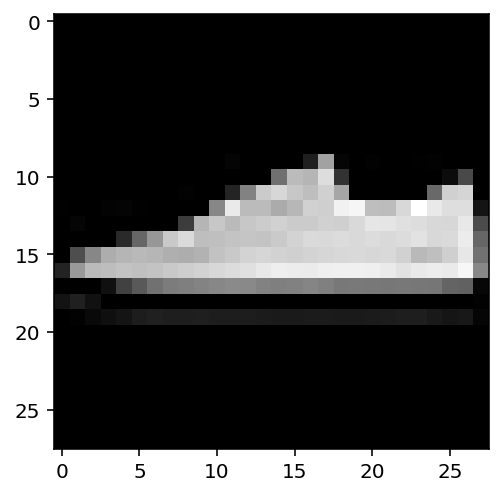

In [18]:
%matplotlib inline
import helper
import matplotlib.pyplot as plt

images, labels = next(iter(train_loader))
img = images[0].view(1,784)
with torch.no_grad():
  logits = model(img)

ps = F.softmax(logits,dim=1)
print(ps[0])
plt.imshow(img.view(1,28,28).numpy().squeeze(),cmap='gray')

# Validation

In [40]:
modelClassifier = Network()
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(),lr=0.003)

epochs =5
steps =0
test_loader = torch.utils.data.DataLoader(testset, batch_size=64,shuffle=True)


test_accuracy=0
for images, labels in test_loader:
  with torch.no_grad():
    loss=0
    accuracy=0
    img = images
    logits = model(img)
    ps = F.softmax(logits,dim=1)
    top_p, top_class = ps.topk(1,dim=1)
    # print(ps)
    # print(top_class.shape)
    # print(labels.shape)
    equals = top_class == labels.view(*top_class.shape)
    accuracy = torch.mean(equals.type(torch.FloatTensor))
    loss += criterion(logits,labels)
    test_accuracy+=accuracy.item()

print("accuracy ",test_accuracy)
print("loss ",loss)







accuracy  136.59375
loss  tensor(0.3877)


In [34]:
model = Network()

images, labels = next(iter(test_loader))
# Get the class probabilities
ps = torch.exp(model(images))
# Make sure the shape is appropriate, we should get 10 class probabilities for 64 examples
print(ps.shape)

torch.Size([64, 10])


# Train and Test together

In [6]:
if torch.cuda.is_available():  
  dev = "cuda:0" 
else:  
  dev = "cpu"  
device = torch.device(dev) 
print(device)

cuda:0


In [15]:
model = Network_Drop()
model.to(dev)
criterion = nn.NLLLoss(reduction='sum')
optimizer = optim.Adam(model.parameters(), lr=0.003)

epochs = 20

train_losses, test_losses = [], []
for e in range(epochs):
    tot_train_loss = 0
    for images, labels in train_loader:
        images = images.to(dev)
        labels = labels.to(dev)
        optimizer.zero_grad()
        
        log_ps = model(images).to(dev)
        loss = criterion(log_ps, labels).to(dev)
        tot_train_loss += loss.item()
        
        loss.backward()
        optimizer.step()
    else:
        tot_test_loss = 0
        test_correct = 0  # Number of correct predictions on the test set
        
        # Turn off gradients for validation, saves memory and computations
        with torch.no_grad():
            for images, labels in test_loader:
                images = images.to(dev)
                labels = labels.to(dev)
                log_ps = model(images).to(dev)
                loss = criterion(log_ps, labels).to(dev)
                tot_test_loss += loss.item()

                ps = torch.exp(log_ps).to(dev)
                top_p, top_class = ps.topk(1, dim=1)
                equals = top_class == labels.view(*top_class.shape)
                test_correct += equals.sum().item()

        # Get mean loss to enable comparison between train and test sets
        train_loss = tot_train_loss / len(train_loader.dataset)
        test_loss = tot_test_loss / len(test_loader.dataset)

        # At completion of epoch
        train_losses.append(train_loss)
        test_losses.append(test_loss)

        print("Epoch: {}/{}.. ".format(e+1, epochs),
              "Training Loss: {:.3f}.. ".format(train_loss),
              "Test Loss: {:.3f}.. ".format(test_loss),
              "Test Accuracy: {:.3f}".format(test_correct / len(test_loader.dataset)))

Epoch: 1/20..  Training Loss: 0.665..  Test Loss: 0.572..  Test Accuracy: 0.804
Epoch: 2/20..  Training Loss: 0.535..  Test Loss: 0.559..  Test Accuracy: 0.816
Epoch: 3/20..  Training Loss: 0.503..  Test Loss: 0.522..  Test Accuracy: 0.821
Epoch: 4/20..  Training Loss: 0.489..  Test Loss: 0.539..  Test Accuracy: 0.819
Epoch: 5/20..  Training Loss: 0.475..  Test Loss: 0.519..  Test Accuracy: 0.824
Epoch: 6/20..  Training Loss: 0.470..  Test Loss: 0.513..  Test Accuracy: 0.828
Epoch: 7/20..  Training Loss: 0.461..  Test Loss: 0.506..  Test Accuracy: 0.827
Epoch: 8/20..  Training Loss: 0.450..  Test Loss: 0.504..  Test Accuracy: 0.826
Epoch: 9/20..  Training Loss: 0.459..  Test Loss: 0.523..  Test Accuracy: 0.824
Epoch: 10/20..  Training Loss: 0.442..  Test Loss: 0.516..  Test Accuracy: 0.823
Epoch: 11/20..  Training Loss: 0.441..  Test Loss: 0.529..  Test Accuracy: 0.825
Epoch: 12/20..  Training Loss: 0.451..  Test Loss: 0.512..  Test Accuracy: 0.829
Epoch: 13/20..  Training Loss: 0.438.

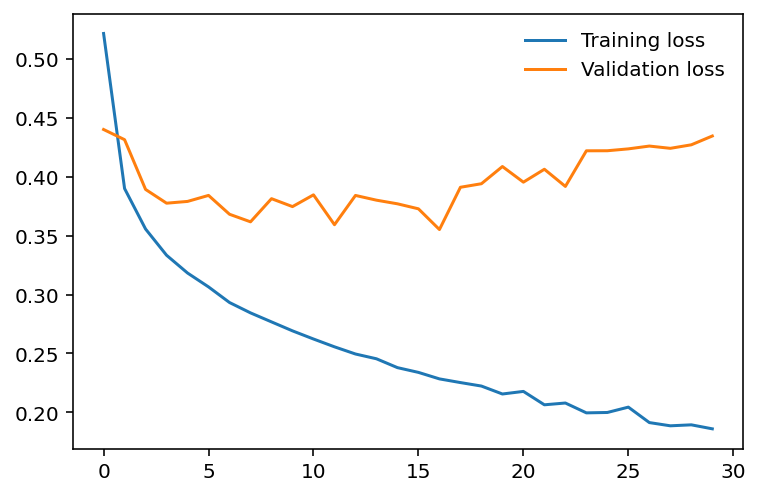

In [12]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt

plt.plot(train_losses, label='Training loss')
plt.plot(test_losses, label='Validation loss')
plt.legend(frameon=False)

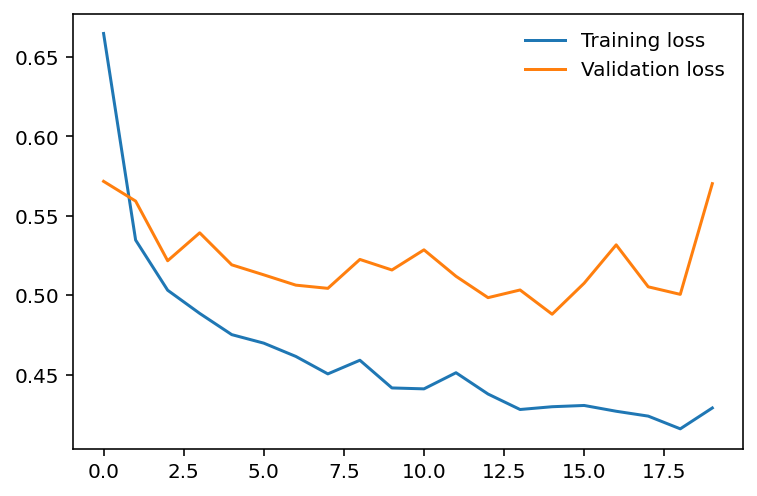

In [16]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt

plt.plot(train_losses, label='Training loss')
plt.plot(test_losses, label='Validation loss')
plt.legend(frameon=False)